# Perceptron - classification using gradient descent (exercise)

In this exercise, implement a single neuron (perceptron) for classification of two species of flowers using gradient descent.

The Iris data set consists of 50 samples from each of three species of flowers (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

For the purpose of this exercise, use only two features (sepal length and sepal width) of two specie of flowers (Setosa and Versicolor).

In [2]:
# allow inline plotting below each cell
%matplotlib inline

In [3]:
# import necessary libraries 
from matplotlib import pyplot as plt
import numpy as np
import time
from IPython import display

In [4]:
# Function that plots data and classification line
def plot_border(w1, b, data, fig):
    
    plt.axis([0, 10, 0, 6])
    plt.grid()
    
    # scatter data
    for i in range(len(data)) :
        point = data[i]
        color = "r"
        if point[2] == 0 :
            color = "b"
        plt.scatter(point[0], point[1], c=color)

    # classification line
    x = np.linspace(0,10,100)
    plt.plot(x, w1*x+b, '-g', label='y=w1*x+b')
    plt.show()

In [5]:
# write a prediction function: 0 for Iris-setosa and 1 for Iris-versicolor
def guess_flower(SepalLength, SepalWidth):
    z = SepalLength * w1 + SepalWidth * w2 + b
    prediction = sigmoid(z)
    if prediction < .5:
        print('Iris-setosa')
    else:
        print('Iris-versicolor')

In [16]:
### load data ###

# each point is a tuple (sepal length, sepal width, flower type)
# types: 0 for Setosa and 1 for Versicolor
data = [[ 5.1,  3.5,  0 ],
       [ 4.9,  3. ,  0 ],
       [ 4.7,  3.2,  0 ],
       [ 4.6,  3.1,  0 ],
       [ 5. ,  3.6,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 4.6,  3.4,  0 ],
       [ 5. ,  3.4,  0 ],
       [ 4.4,  2.9,  0 ],
       [ 4.9,  3.1,  0 ],
       [ 5.4,  3.7,  0 ],
       [ 4.8,  3.4,  0 ],
       [ 4.8,  3. ,  0 ],
       [ 4.3,  3. ,  0 ],
       [ 5.8,  4. ,  0 ],
       [ 5.7,  4.4,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 5.1,  3.5,  0 ],
       [ 5.7,  3.8,  0 ],
       [ 5.1,  3.8,  0 ],
       [ 7. ,  3.2,  1 ],
       [ 6.4,  3.2,  1 ],
       [ 6.9,  3.1,  1 ],
       [ 5.5,  2.3,  1 ],
       [ 6.5,  2.8,  1 ],
       [ 5.7,  2.8,  1 ],
       [ 6.3,  3.3,  1 ],
       [ 4.9,  2.4,  1 ],
       [ 6.6,  2.9,  1 ],
       [ 5.2,  2.7,  1 ],
       [ 5. ,  2. ,  1 ],
       [ 5.9,  3. ,  1 ],
       [ 6. ,  2.2,  1 ],
       [ 6.1,  2.9,  1 ],
       [ 5.6,  2.9,  1 ],
       [ 6.7,  3.1,  1 ],
       [ 5.6,  3. ,  1 ],
       [ 5.8,  2.7,  1 ],
       [ 6.2,  2.2,  1 ],
       [ 5.6,  2.5,  1 ],
       [ 5.9,  3.2,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.3,  2.5,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.4,  2.9,  1 ]]

mystery_flower = [ 6.6,  3]

In [7]:
# Functions that compute the output of a sigmoid activation function and its derivative

def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

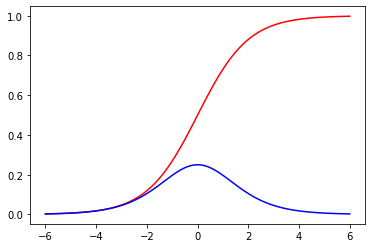

In [8]:
# visualize activation function and its derivative
T = np.linspace(-6, 6, 100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

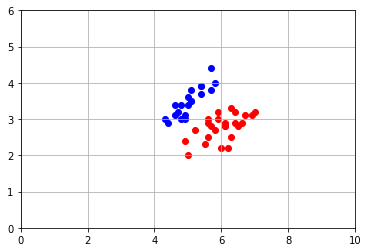

In [11]:
# visualize data
plt.axis([0, 10, 0, 6])
plt.grid()
for i in range(len(data)) :
    point = data[i]
    color = "r"
    if point[2] == 0 :
        color = "b"
    plt.scatter(point[0], point[1], c=color)

epoch:  99 , cost: 0.32211985825123934 , acc:  1.0


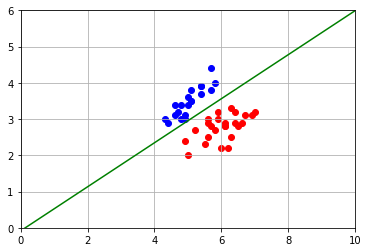

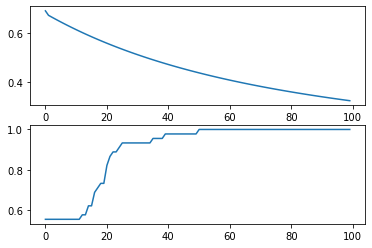

In [12]:
# write a training loop

# initialize weights and bias
learning_rate = 0.1

costs = []
accs = []
epochs = 100
m = len(data)

w1 = 0
w2 = 0
b = 0
fig = plt.figure()

# inside the loop:

# compute cost function
# compute gradients
# update weights and bias
# compute cost

# plot costs

for i in range(epochs):
    
    cost = 0 
    acc = 0
    dw1 = 0
    dw2 = 0
    db = 0
    
    for j in range(m):
        point = data[j]
    
        z = point[0] * w1 + point[1] * w2 + b
        a = sigmoid(z)
    
        y = point[2]
    
        # loss function
        loss = -(y*np.log(a) + (1-y)*np.log(1-a))
        
        # cost
        cost += loss
    
        # derivatives of the cost function wrt weights and bias
        dz = a - y
        dw1 += point[0] * dz
        dw2 += point[1] * dz
        db += dz
        
        if ((a < 0.5 and y == 0) or (a >= 0.5 and y == 1)):
            acc += 1
    
    # cost
    cost = cost / m
        
    # accuracy
    acc = acc / m 
    
    # update weights and bias
    dw1 = dw1 / m
    dw2 = dw2 / m
    db = db / m
    w1 = w1 - learning_rate * dw1
    w2 = w2 - learning_rate * dw2
    b = b - learning_rate * db

#     if i % 10 == 0:
    # plot the classification line
    plot_border(-w1/w2, -b/w2, data, fig)
    display.clear_output(wait=True)
    time.sleep(0.1)

    print("epoch: ", i, ", cost:", cost, ", acc: ", acc)
    
    costs.append(cost)
    accs.append(acc)

# plot the final classification line
plot_border(-w1/w2, -b/w2, data, fig)

# plot costs
plt.subplot(2, 1, 1)
plt.plot(costs)
# plot accuracy
plt.subplot(2, 1, 2)
plt.plot(accs)
plt.show()


In [13]:
# make predictions on test data 

test_data = [[ 5.4,  3.4,  0. ],
           [ 4.6,  3.6,  0. ],
           [ 5.1,  3.3,  0. ],
           [ 4.8,  3.4,  0. ],
           [ 5. ,  3. ,  0. ],
           [ 5. ,  3.4,  0. ],
           [ 5.2,  3.5,  0. ],
           [ 5.2,  3.4,  0. ],
           [ 4.7,  3.2,  0. ],
           [ 4.8,  3.1,  0. ],
           [ 5.4,  3.4,  0. ],
           [ 5.2,  4.1,  0. ],
           [ 5.5,  4.2,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 5. ,  3.2,  0. ],
           [ 5.5,  3.5,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 4.4,  3. ,  0. ],
           [ 5.1,  3.4,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 4.5,  2.3,  0. ],
           [ 4.4,  3.2,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.8,  3. ,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.6,  3.2,  0. ],
           [ 5.3,  3.7,  0. ],
           [ 5. ,  3.3,  0. ],
           [ 6.8,  2.8,  1. ],
           [ 6.7,  3. ,  1. ],
           [ 6. ,  2.9,  1. ],
           [ 5.7,  2.6,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.8,  2.7,  1. ],
           [ 6. ,  2.7,  1. ],
           [ 5.4,  3. ,  1. ],
           [ 6. ,  3.4,  1. ],
           [ 6.7,  3.1,  1. ],
           [ 6.3,  2.3,  1. ],
           [ 5.6,  3. ,  1. ],
           [ 5.5,  2.5,  1. ],
           [ 5.5,  2.6,  1. ],
           [ 6.1,  3. ,  1. ],
           [ 5.8,  2.6,  1. ],
           [ 5. ,  2.3,  1. ],
           [ 5.6,  2.7,  1. ],
           [ 5.7,  3. ,  1. ],
           [ 5.7,  2.9,  1. ],
           [ 6.2,  2.9,  1. ],
           [ 5.1,  2.5,  1. ],
           [ 5.7,  2.8,  1. ]]

# test set accuracy 
test_acc = 0
for j in range(len(test_data)):
    point = test_data[j]

    z = point[0] * w1 + point[1] * w2 + b
    a = sigmoid(z)

    y = point[2]

    if ((a < 0.5 and y == 0) or (a >= 0.5 and y == 1)):
        test_acc += 1

# accuracy
test_acc = test_acc / len(test_data) 
print("test_acc: ", test_acc)

test_acc:  0.9811320754716981


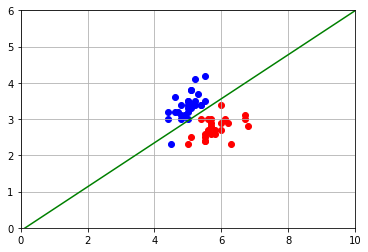

In [14]:
# plot the classification for test data
fig = plt.figure()
plot_border(-w1/w2, -b/w2, test_data, fig)

In [17]:
# predict the mystery flower 
print("The mistery flower is:")
guess_flower(mystery_flower[0], mystery_flower[1])

The mistery flower is:
Iris-versicolor


In [ ]:
# compute and plot the classification line
